House in USA DataScience Project

Imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import requests
import seaborn as sns

# Dataset Overview

**Dataset upload**

In [3]:
df = pd.read_csv("../raw_data/kc_house_data 2.csv", parse_dates=['date'])

**Dataset Overview**

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**Preprocessing Dataset**

In [6]:
df.duplicated().sum()

0

In [7]:
missing_col = df.isnull().sum().sort_values(ascending=False)
missing_col

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

# Data pre-analysis

**Correlation**

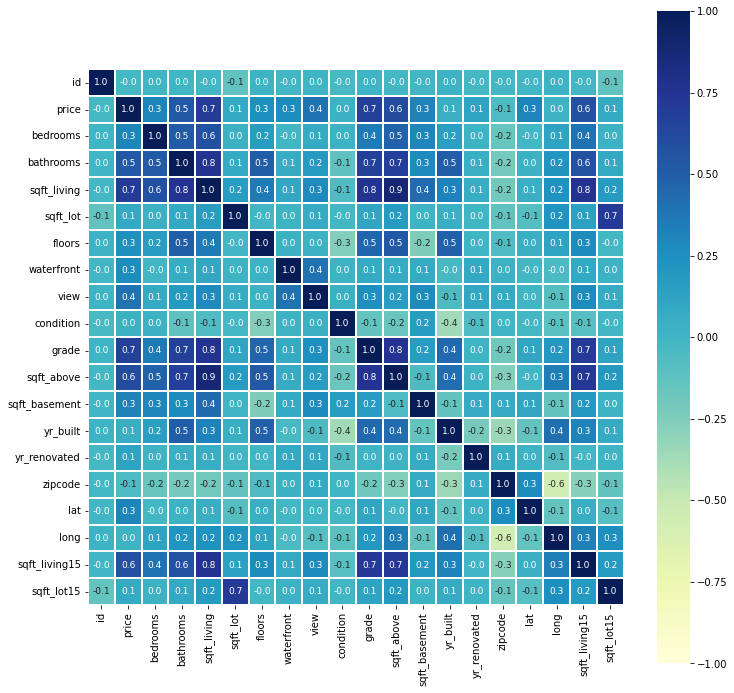

In [9]:
# corr = df.corr() -- Pearson Correlation

fig, ax = plt.subplots(figsize = (12, 12))
# Heatmap
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, fmt = ".1f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "white", cbar = True)

sns.despine(top = True, right = True, left = True, bottom = True)

In [10]:
# Focusing on house prices
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [20]:
# Looking at the highest correlation features with price:
df_corr = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]

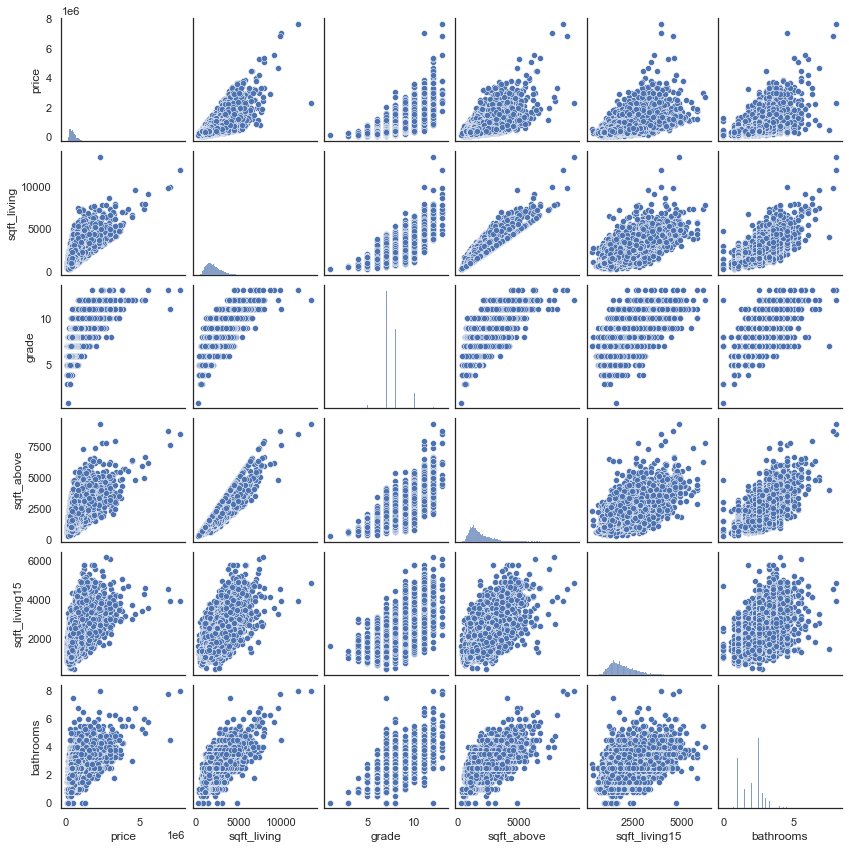

In [21]:
sns.set(style='white')
sns.pairplot(df_corr, height=2)
plt.show()

# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [22]:
X = df.drop(columns=['price','id','date'])
y = df['price']

👇 Cross validate a linear regression model. The score under variable name saved as `base_model_score`.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.695187524773045

👇 Feature Permutation to identify the importance of each feature in the model

In [24]:
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=300) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
8,grade,0.188335
2,sqft_living,0.152776
14,lat,0.10361
11,yr_built,0.088024
9,sqft_above,0.050958
5,waterfront,0.037773
6,view,0.024369
0,bedrooms,0.016441
1,bathrooms,0.014837
13,zipcode,0.014379


Removing floors form the model, as it shows the lowest importance

In [26]:
X_floors = df.drop(columns=['price','id','date', 'floors'])
y = df['price']

In [27]:
model_floors = LinearRegression()

scores_floors = cross_val_score(model_floors, X_floors, y, cv=10)

base_model_score_floors = scores_floors.mean()

base_model_score_floors

0.6952013408641111

# Multivariate Linear Regression (with statsmodel)

Selecting the features for our model

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [32]:
formula = "price ~ " + ' + '.join(features)

⚖️ **Standardize the features.**

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others


📅 , we will discover Machine Learning Algorithms. We will also need to perform some scaling operations before trying to predict any target.

In [33]:
orders_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,...,-0.558823,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709
1,6414100192,2014-12-09,538000.0,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,...,-0.558823,0.460830,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863
2,5631500400,2015-02-25,180000.0,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,...,-1.409554,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371
3,2487200875,2014-12-09,604000.0,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,...,-0.558823,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515
4,1954400510,2015-02-18,510000.0,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,...,0.291909,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.087171,-0.305752,...,0.291909,-0.312032,-0.658666,1.293512,-0.210124,0.468371,1.004935,-0.938047,-0.666119,-0.412371
21609,6600060120,2015-02-23,400000.0,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.087171,-0.305752,...,0.291909,0.629894,-0.658666,1.463734,-0.210124,1.272034,-0.356172,-1.051660,-0.228413,-0.203942
21610,1523300141,2014-06-23,402101.0,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.087171,-0.305752,...,-0.558823,-0.927906,-0.658666,1.293512,-0.210124,1.234654,0.247882,-0.604307,-1.410220,-0.394132
21611,291310100,2015-01-16,400000.0,-0.398728,0.500209,-0.522516,-0.307069,0.936484,-0.087171,-0.305752,...,0.291909,-0.227500,-0.658666,1.123290,-0.210124,-0.952056,-0.184410,1.028887,-0.841202,-0.420502


In [35]:
import statsmodels.formula.api as smf
model_OS = smf.ols(formula = formula, data = orders_standardized).fit()
print(model_OS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:15:20   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.404e+05   1396.644    386.918